#### MNIST data (.idx3-ubyte -> numpy array)

In [1]:
import tensorflow as tf
import numpy as np

import idx2numpy
import matplotlib.cm as cm
import matplotlib.pyplot as plt

PATH = 'C:/Projects/keras_talk/keras/intern/0709/MNIST/'
EPOCHS = 20
BATCH_SIZE = 50

x_test_path = 't10k-images.idx3-ubyte'
y_test_path = 't10k-labels.idx1-ubyte'
x_train_path = 'train-images.idx3-ubyte'
y_train_path = 'train-labels.idx1-ubyte'


x_test = idx2numpy.convert_from_file(PATH+x_test_path)
y_test = idx2numpy.convert_from_file(PATH+y_test_path)
x_train = idx2numpy.convert_from_file(PATH+x_train_path)
y_train = idx2numpy.convert_from_file(PATH+y_train_path)


x_test = x_test.reshape(x_test.shape[0], 28,28,1).astype('float32') / 255.
x_train = x_train.reshape(x_train.shape[0], 28,28,1).astype('float32') / 255.
y_test = tf.keras.utils.to_categorical(y_test,10)
y_train = tf.keras.utils.to_categorical(y_train,10)



####  CNN model 구성

In [2]:

import tensorflow.keras.utils
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


model = tf.keras.Sequential()

Conv1 = Conv2D( 16, kernel_size=(3,3), activation='relu', input_shape=(28,28,1) )
Conv2 = Conv2D( 32, kernel_size=(3,3), activation='relu' )
MaxP  = MaxPooling2D(pool_size=(2,2))
Flat  = Flatten()
Lay1  = Dense( 32, activation='relu')
Lay2  = Dense( 10, activation='softmax')

model.add(Conv1)
model.add(Conv2)
model.add(MaxP)
model.add(Flat)
model.add(Lay1)
model.add(Lay2)



#### model 학습

In [3]:


model.compile( loss='categorical_crossentropy',
               optimizer='adam',metrics=['accuracy'])

hist = model.fit( x_train, y_train, epochs=EPOCHS,
                  validation_data=(x_test, y_test), batch_size=BATCH_SIZE)

scores = model.evaluate( x_test, y_test, steps=5 )
print("{}: {:0.2f}%".format(model.metrics_names[1], scores[1]*100))



Epoch 1/20
1200/1200 [==============================] - 29s 25ms/step - loss: 0.1714 - accuracy: 0.9478 - val_loss: 0.0518 - val_accuracy: 0.9823
Epoch 2/20
1200/1200 [==============================] - 30s 25ms/step - loss: 0.0520 - accuracy: 0.9838 - val_loss: 0.0444 - val_accuracy: 0.9857
Epoch 3/20
1200/1200 [==============================] - 30s 25ms/step - loss: 0.0373 - accuracy: 0.9886 - val_loss: 0.0366 - val_accuracy: 0.9875
Epoch 4/20
1200/1200 [==============================] - 30s 25ms/step - loss: 0.0256 - accuracy: 0.9920 - val_loss: 0.0351 - val_accuracy: 0.9895
Epoch 5/20
1200/1200 [==============================] - 38s 32ms/step - loss: 0.0200 - accuracy: 0.9934 - val_loss: 0.0370 - val_accuracy: 0.9890
Epoch 6/20
1200/1200 [==============================] - 40s 34ms/step - loss: 0.0172 - accuracy: 0.9941 - val_loss: 0.0350 - val_accuracy: 0.9887
Epoch 7/20
1200/1200 [==============================] - 39s 32ms/step - loss: 0.0109 - accuracy: 0.9966 - val_loss: 0.0354 -

#### model 학습 과정 표시

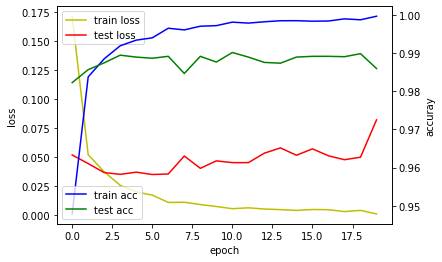

In [4]:


%matplotlib inline
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='test acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()



#### test data set 결과

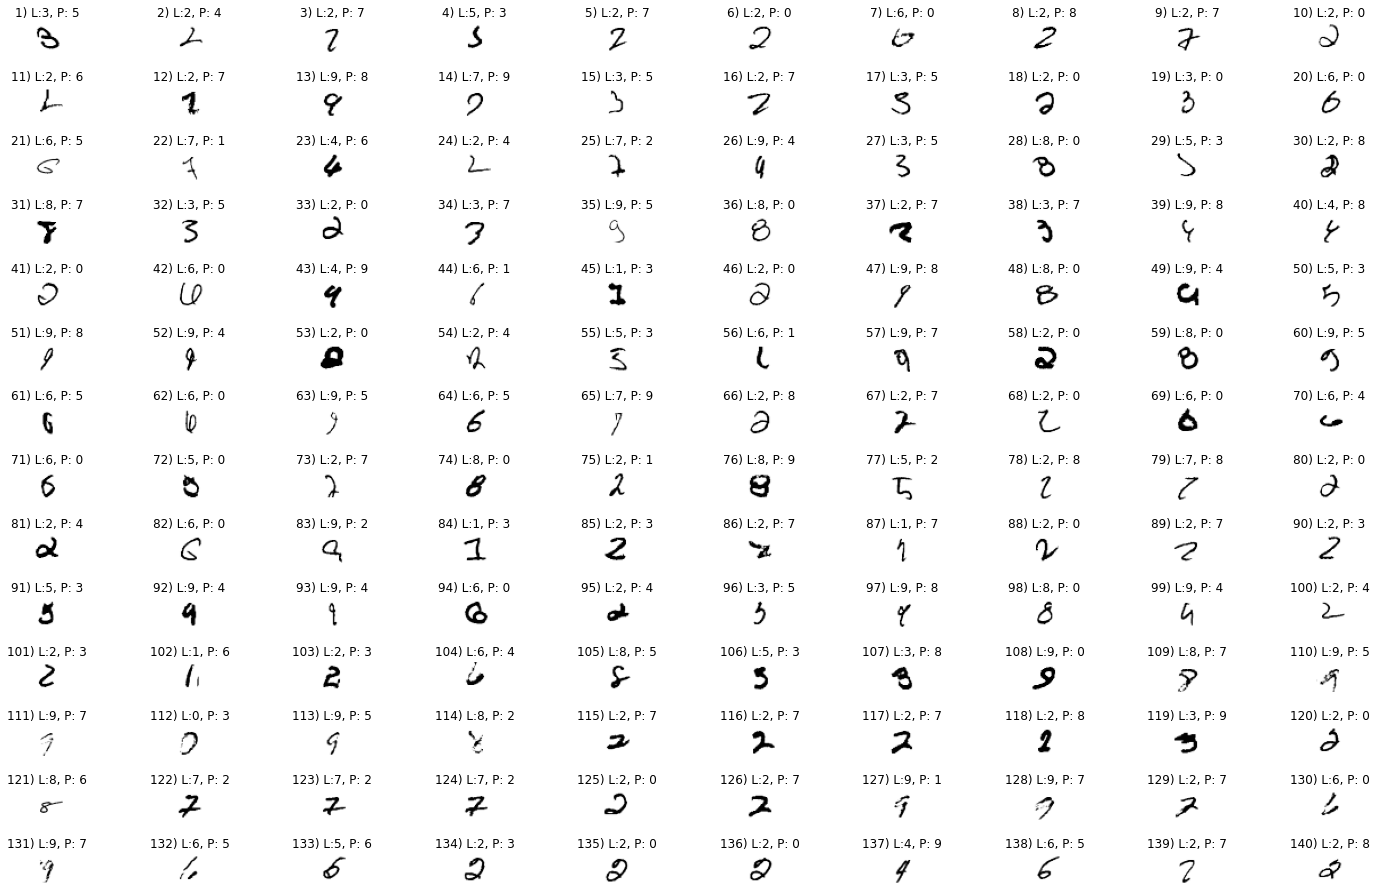

In [5]:


PREDICTED_RESULT = model.predict(x_test)
PREDICTED_LABELS = np.argmax(PREDICTED_RESULT, axis=1)
TEST_LABELS = np.argmax(y_test, axis=1)
WRONG_RESULTS = []

for n in range(len(TEST_LABELS)):
    if PREDICTED_LABELS[n] != TEST_LABELS[n]:
        WRONG_RESULTS.append(n)


plt.figure(figsize = ( len(WRONG_RESULTS)//10 +2, 10 ))
for n in range(len(WRONG_RESULTS)):
    idx = WRONG_RESULTS[n]
    plt.subplot( len(WRONG_RESULTS)//10 +2, 10, n+1)
    plt.imshow( x_test[idx].reshape(28,28), cmap='Greys' )
    tmp = str(n+1)+")"+" L:"+ str(TEST_LABELS[idx]) + ", P: "+ str(PREDICTED_LABELS[idx])
    plt.title(tmp)
    plt.axis("off")

plt.subplots_adjust(right=1.3, top=1.5, wspace=1, hspace=1)
plt.savefig('MNIST CNN.png', bbox_inches='tight')
plt.show()
